# Part II - An Analysis of Prosper Loan Data
## by Fori Joseph

## Investigation Overview

> Prosper is an online lending platform that connects lenders to borrowers. This presentaion will show the relationship between various features and borrower rate, and show that having a good fincial standing will lead to being charged lower rates.

## Dataset Overview

> I investigated a dataset called Prosper Loan Data that contained information on 113,937 loan entries spanning 2009 to 2014 with 81 attributes on each loan. The attributes included demographic information on the borrowers such as their annual income, wether or not they are homeowners and their employment status. We also have information the Borrower APR & Rates, the status of the loans, and the Ratings on the Loan.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')


In [3]:
cols = ['LoanOriginalAmount','LoanStatus','ListingCategory (numeric)', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term',
        'ProsperRating (Alpha)', 'EmploymentStatus','DebtToIncomeRatio', 'ListingCreationDate','BorrowerRate','IsBorrowerHomeowner']

clean_loan=loan[cols]

In [4]:
clean_loan.ListingCreationDate = pd.to_datetime(loan.ListingCreationDate)

# Extract year information from ListingCreationDate column
clean_loan['year']= clean_loan['ListingCreationDate'].dt.year

# Verify results
clean_loan.dtypes[11:13]

IsBorrowerHomeowner     bool
year                   int64
dtype: object

In [5]:
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
clean_loan['ProsperRating (Alpha)'] = clean_loan['ProsperRating (Alpha)'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Relationship between Homeownership and BorrowerAPR over time

> Borrower APR for both Homeowners and non-homeowners have followed a similar trend, with homeowners consistenly being charged a lower APR. The widest gap between the APR for homeowners and non-homeowners is in 2007 which is also the lowest point of APR. At 2007, APR started seeing a steep rise reaching a peak in 2011 where it started falling again.


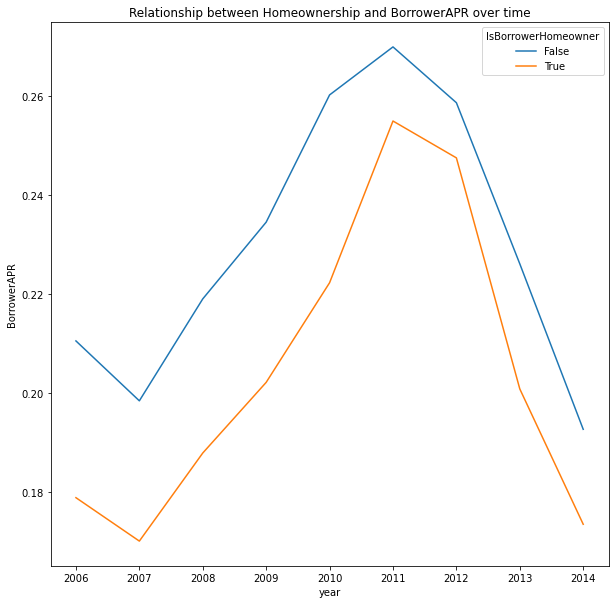

In [6]:
plt.figure(figsize=(10,10))
g=sb.lineplot(data=clean_loan, x='year', y='BorrowerAPR', hue='IsBorrowerHomeowner',ci=None)
plt.title('Relationship between Homeownership and BorrowerAPR over time');

## Relationship between BorrowerAPR, Term and ProsperRating

> Borrower APR is negatively correlated to Prosper Rating therefore people with high ratings get charged low APRs, while the lower ratings get charged high APRs, with the lowest prosper rating (HR) being charged almost 40%. Term on the other hand has a curious relationship APR and Prosper rating, with the lower rated terms having an inverse relationship with APR, i.e. longer terms get lower APR, this carries on until the B rating, at which point term appears to have no effect on APR and then switches on A & AA where longer terms got higher APRs.

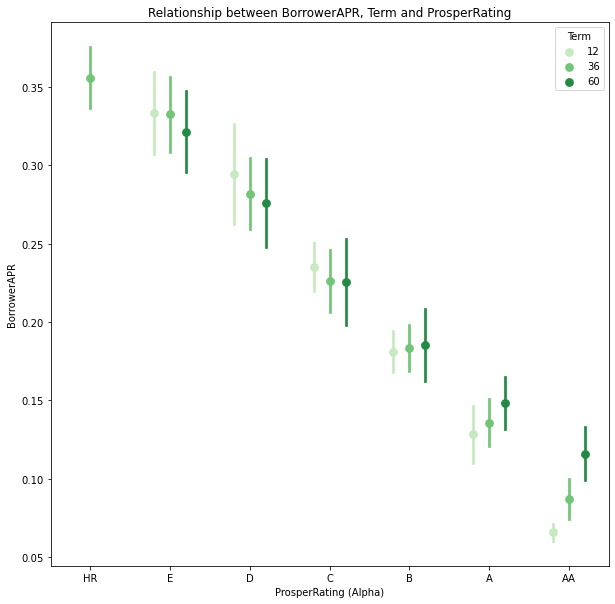

In [7]:
fig = plt.figure(figsize = [10,10])
ax = sb.pointplot(data = clean_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '',dodge = 0.4, ci='sd')
plt.title('Relationship between BorrowerAPR, Term and ProsperRating');

## Comparison of numericle variables

> Here we can see that APR and Loan Amount have a negative coefficient of -0.32, showing that higher loans get lower APRs. The relationship between APR, Monthly income and Debt to Income ratio is not very strong. 


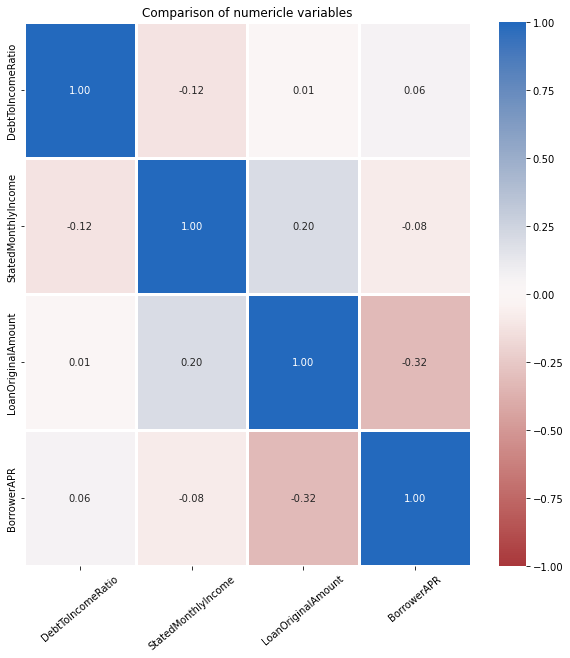

In [8]:
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR']

plt.figure(figsize= (10, 10))
sb.heatmap(data=clean_loan[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40)
plt.title('Comparison of numericle variables');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 693861 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\fori.tatama\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\fori.tatama\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\fori.tatama\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\fori.tatama\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\fori.tatama\Anaconda3\lib\site-packages\nbc

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 